In [10]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"""x_train:{x_train.shape} y_train:{y_train.shape} 
        x_tesst:{x_test.shape} y_test:{y_test.shape}""")

x_train:(60000, 28, 28) y_train:(60000,) 
        x_tesst:(10000, 28, 28) y_test:(10000,)


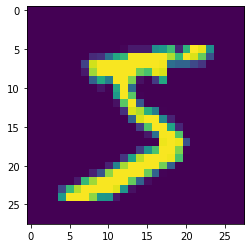

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()

for y in range(28):
    for x in range(28):
        print(f"{x_train[0][y][x]}", end=" ")
    print()

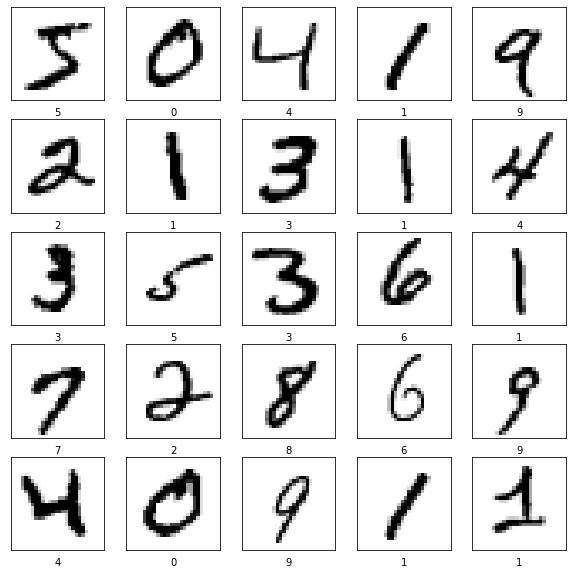

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(60000,784), x_test.reshape(10000,784)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=20)

model.evaluate(x_test, y_test)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2615 - accuracy: 0.9251
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1149 - accuracy: 0.9661
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9763
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9817
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9915
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0191 - accuracy: 0.9940
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.016

[0.11999598145484924, 0.9764999747276306]

In [14]:
p_test = model.predict(x_test)
print(f"p_test[0]:{p_test[0]}")

313/313 [==============================] - 1s 2ms/step
p_test[0]:[2.9210646e-14 6.5661967e-13 1.4858009e-09 1.2284877e-05 3.3922660e-17
 4.9635375e-14 2.6198412e-24 9.9963641e-01 4.8198338e-11 3.5134351e-04]


p_test[0]:4 y_test[0]: 4


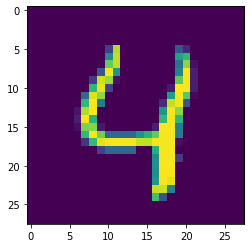

In [15]:
import numpy as np

print(f"p_test[0]:{np.argmax(p_test[4])} y_test[0]: {y_test[4]}")

x_test = x_test.reshape(10000, 28, 28)

plt.figure()
plt.imshow(x_test[4])
plt.show()

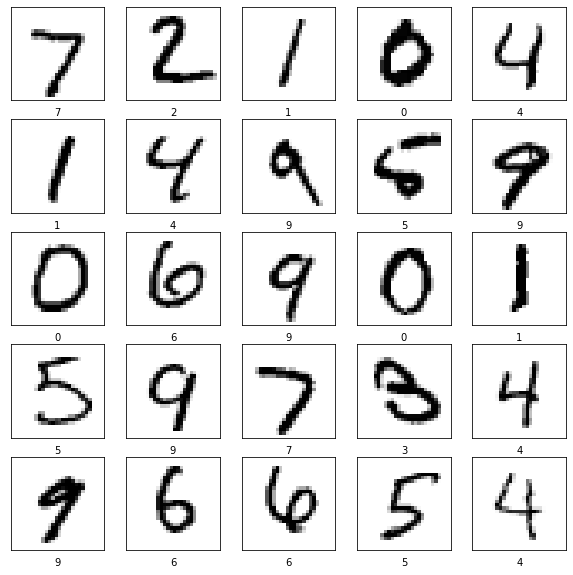

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(p_test[i]))
plt.show()

In [17]:
cnt_wrong = 0
p_wrong = []
for i in range(10000):
    if np.argmax(p_test[i]) != y_test[i]:
        p_wrong.append(i)
        cnt_wrong += 1

print(f"cnt_wrong:{cnt_wrong}")
print(f"predicted wrong 10:{p_wrong[:10]}")

cnt_wrong:235
predicted wrong 10:[124, 151, 247, 268, 340, 391, 495, 582, 610, 619]


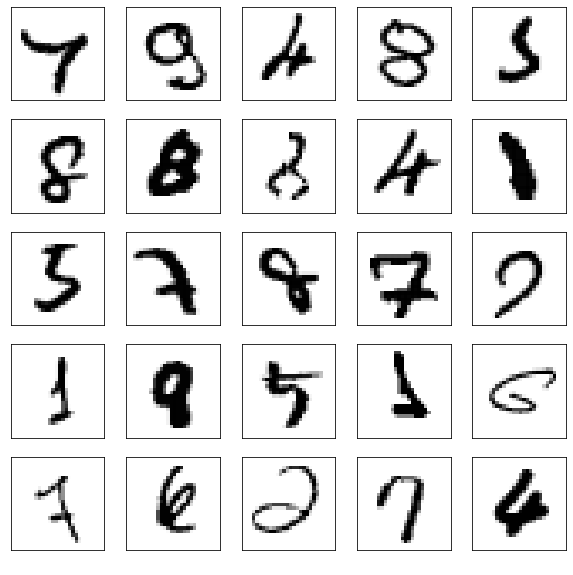

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[p_wrong[i]], cmap=plt.cm.binary)
    plt.xlabel(f"""{p_wrong[i]} : {np.argmax(p_test[p_wrong[i]])} {y_test[p_wrong[i]]}""", color="white")
plt.show()